# Исследование рынка заведений общественного питания Москвы

Презентация: https://drive.google.com/file/d/1YI73cSYbQILBCNSDj2u6wk_VAWdn-xJ2/view?usp=sharing

Цель:   дать рекомендации для открытия кофейни в Москве   
Задача: Изучить рынок заведений общественного питания Москвы

## Описание данных



Файл `moscow_places.csv`:      
`name` — название заведения;     
`address` — адрес заведения;    
`category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;      
`hours` — информация о днях и часах работы;      
`lat` — широта географической точки, в которой находится заведение;      
`lng` — долгота географической точки, в которой находится заведение;     
`rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);     
`price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;    
`avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона,  
`middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:      
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.     
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.     
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.      
`middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:      
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.     
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.     
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.     
`chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):     
0 — заведение не является сетевым    
1 — заведение является сетевым     
`district` — административный район, в котором находится заведение, например Центральный административный округ;    
`seats` — количество посадочных мест.    



1. [Предобработка данных](#start)
2. [Анализ данных рынка](#analisys)
 - [Категории заведений](#category)
 - [Количество посадочных мест в заведениях от мест города](#seats)
 - [Соотношение сетевых и несетевых заведений](#net)
 - [Топ-15 популярных сетевых заведений](#top_15_popular_point)
 - [Районы и заведения](#district)
 - [Распределение средних рейтингов по категориям](#mean_rating_category)
 - [Средний рейтинг запведений каждого района](#mean_rating_district)
 - [Заведения общепита на карте](#points_map)
 - [Топ-15 улиц по числу заведений](#top_15_street)
 - [Улицы с одним заведением](#one-point)
 - [Средний чек заведения от расстояния до центра города](#bill_center)
 3. [Общий вывод по исследованию рынка заведений](#total_result)
 4. [Изучение кофеен](#coffein)
  - [Число кофеен в городе](#count-coffein)
  - [Режим работы](#time-work)
  - [Средний чек чашки капучино](#cup-coffein)
  - [Рейтинг в районах](#rating-coffein)

 5. [Итоги](#end)




Грузим необходимые библиотеки для анализа

In [ ]:
try:
    import pandas as pd
    import numpy as np
    import math as mth

    # импортируем карту и маркер
    from folium import Map, Marker,Choropleth,features, Circle
    # импортируем кластер
    from folium.plugins import MarkerCluster

    import json

    import plotly.express as px
    import matplotlib.pyplot as plt
    import seaborn as sb
    
    import warnings
    warnings.filterwarnings('ignore')
    
    # для просмотретра проекта на nbviewer.org ---------
    from plotly.offline import plot, iplot, init_notebook_mode
    init_notebook_mode(connected=True)
    import plotly.io as pio
    # ----------------------------------------------------
    
except Exception as error:
    print(error)

и необходимые файлы

In [2]:
major_path = r'C:\Users\X\data'



try:
    data = pd.read_csv(major_path + '/moscow_places.csv')
    geomap = major_path + '/admin_level_geomap.geojson'


except Exception as error:
    print(error)
    
    geomap = '/datasets/admin_level_geomap.geojson'

    data = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

[Errno 2] No such file or directory: 'C:\\Users\\X\\Desktop\\Yandex_Practicum\\module_3\\project_1\\data/moscow_places.csv'


## Предобработка <a class="anchor"  id="start"></a>

принудительно без проверок уберем пробелы слева и справа от названия столбцов(даже если их там и небыло), чтобы они нам не помешали при обрвщении к столбцам

In [3]:
data.columns = list(map(lambda x: x.strip(), data.columns))

При помощи функции ниже рассмотрим общую информацию о таблице

In [4]:
def get_info_dataframe(dataframe,
                       transpose=False,
                       count_rows=5
                       ):
    """
    получение основной информации о датафрейме  
    `dataframe` - исследуемый датафрейм   
    `transpose` - перевернуть таблицу на 90°    
    `count_rows` - чило выводимых строк
    """

    # -----------------сбока таблицы с пропусками---------------------
    # число пропусков
    count_missing = dataframe.isna().sum()
    # доля пропусков
    missing_percent = count_missing/len(dataframe)*100

    # сборка
    df = pd.DataFrame(
        data={
            'missing_percent': missing_percent,
            'count_missing': count_missing
        }
    )
    
    # цветной бар в столбце с долей пропусков и добапвляем знак %
    
    table = (df
             .style
             .bar(subset="missing_percent",
                 vmax=100,
                 color='red')
             .format(
                 subset="missing_percent",
                 formatter="{:.2f} %")
             )
    # --------------------------------------

    # сводная информация
    print(dataframe.info())

    # часть таблицы
    if transpose == True:
        display(dataframe.head(count_rows).T)
    else:
        display(dataframe.head(count_rows))

    # число дубликатов
    print(f'\nдубликатов: {dataframe.duplicated().sum()}\n{". "*10}'.upper())

    # число пропусков
    print(f'\nпропуски'.upper())
    display(table)

    print('----'*20)

In [5]:

get_info_dataframe(data, transpose=True)

Using matplotlib backend: <object object at 0x000002372B2D1FA0>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ 

,0,1,2,3,4
name,WoWфли,Четыре комнаты,Хазри,Dormouse Coffee Shop,Иль Марко
category,кафе,ресторан,кафе,кофейня,пиццерия
address,"Москва, улица Дыбенко, 7/1","Москва, улица Дыбенко, 36, корп. 1","Москва, Клязьминская улица, 15","Москва, улица Маршала Федоренко, 12","Москва, Правобережная улица, 1Б"
district,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ
hours,"ежедневно, 10:00–22:00","ежедневно, 10:00–22:00","пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...","ежедневно, 09:00–22:00","ежедневно, 10:00–22:00"
lat,55.878494,55.875801,55.889146,55.881608,55.881166
lng,37.47886,37.484479,37.525901,37.48886,37.449357
rating,5.0,4.5,4.6,5.0,5.0
price,NaN,выше среднего,средние,NaN,средние
avg_bill,NaN,Средний счёт:1500–1600 ₽,Средний счёт:от 1000 ₽,Цена чашки капучино:155–185 ₽,Средний счёт:400–600 ₽



ДУБЛИКАТОВ: 0
. . . . . . . . . . 

ПРОПУСКИ


,missing_percent,count_missing
name,0.00 %,0
category,0.00 %,0
address,0.00 %,0
district,0.00 %,0
hours,6.38 %,536
lat,0.00 %,0
lng,0.00 %,0
rating,0.00 %,0
price,60.56 %,5091
avg_bill,54.60 %,4590


--------------------------------------------------------------------------------


Типы данных соответсвуют содержимому,   
пропуски заполнять не будем:  
- во-первых, их много 
- во-вторых, данные индивидуальны для каждого заведения. Будем работать с тем что есть.  

Дастанем из столбца с адресом название улицы и запишем в столбец

In [6]:
data['street'] = (data['address']
                  .apply(lambda x: x
                         # на основе разделителя получаем список,достаем улицу
                         .split(',')[1]
                         .strip())  # и убираем крайние пробелы
                  )

data.head().T

,0,1,2,3,4
name,WoWфли,Четыре комнаты,Хазри,Dormouse Coffee Shop,Иль Марко
category,кафе,ресторан,кафе,кофейня,пиццерия
address,"Москва, улица Дыбенко, 7/1","Москва, улица Дыбенко, 36, корп. 1","Москва, Клязьминская улица, 15","Москва, улица Маршала Федоренко, 12","Москва, Правобережная улица, 1Б"
district,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ
hours,"ежедневно, 10:00–22:00","ежедневно, 10:00–22:00","пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...","ежедневно, 09:00–22:00","ежедневно, 10:00–22:00"
lat,55.878494,55.875801,55.889146,55.881608,55.881166
lng,37.47886,37.484479,37.525901,37.48886,37.449357
rating,5.0,4.5,4.6,5.0,5.0
price,NaN,выше среднего,средние,NaN,средние
avg_bill,NaN,Средний счёт:1500–1600 ₽,Средний счёт:от 1000 ₽,Цена чашки капучино:155–185 ₽,Средний счёт:400–600 ₽


Отметим заведения работающие и круглосуточно и ежедневно

In [7]:
data['is_24_7'] = (data['hours']
                   .apply(lambda x:
                          True
                          if x == 'ежедневно, круглосуточно'
                          else False)
                   )


data.head().T

,0,1,2,3,4
name,WoWфли,Четыре комнаты,Хазри,Dormouse Coffee Shop,Иль Марко
category,кафе,ресторан,кафе,кофейня,пиццерия
address,"Москва, улица Дыбенко, 7/1","Москва, улица Дыбенко, 36, корп. 1","Москва, Клязьминская улица, 15","Москва, улица Маршала Федоренко, 12","Москва, Правобережная улица, 1Б"
district,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ
hours,"ежедневно, 10:00–22:00","ежедневно, 10:00–22:00","пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...","ежедневно, 09:00–22:00","ежедневно, 10:00–22:00"
lat,55.878494,55.875801,55.889146,55.881608,55.881166
lng,37.47886,37.484479,37.525901,37.48886,37.449357
rating,5.0,4.5,4.6,5.0,5.0
price,NaN,выше среднего,средние,NaN,средние
avg_bill,NaN,Средний счёт:1500–1600 ₽,Средний счёт:от 1000 ₽,Цена чашки капучино:155–185 ₽,Средний счёт:400–600 ₽


Обозначим сетевые заведения как сетевые и наоборот в столбце `chain`

In [8]:
data['chain'] = (data['chain']
                 .apply(lambda x:
                        'сетевое заведение'
                        if x == 1
                        else 'не сетевое заведение')
                 )

data.head().T

,0,1,2,3,4
name,WoWфли,Четыре комнаты,Хазри,Dormouse Coffee Shop,Иль Марко
category,кафе,ресторан,кафе,кофейня,пиццерия
address,"Москва, улица Дыбенко, 7/1","Москва, улица Дыбенко, 36, корп. 1","Москва, Клязьминская улица, 15","Москва, улица Маршала Федоренко, 12","Москва, Правобережная улица, 1Б"
district,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ
hours,"ежедневно, 10:00–22:00","ежедневно, 10:00–22:00","пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...","ежедневно, 09:00–22:00","ежедневно, 10:00–22:00"
lat,55.878494,55.875801,55.889146,55.881608,55.881166
lng,37.47886,37.484479,37.525901,37.48886,37.449357
rating,5.0,4.5,4.6,5.0,5.0
price,NaN,выше среднего,средние,NaN,средние
avg_bill,NaN,Средний счёт:1500–1600 ₽,Средний счёт:от 1000 ₽,Цена чашки капучино:155–185 ₽,Средний счёт:400–600 ₽


Проверим есть ли неявные дубликаты. Приведем названия заведений к едниному регистру и избапвимся от пробелов слева и справа.

In [9]:
data['format_name'] = data['name'].apply(lambda x: x.lower().strip())

Проверять дубликаты будем по имени и адресу.  



In [10]:
print('Дубликатов до форматирования имен:',
      data
      .duplicated(subset=['name', 'address'])
      .sum()
      )

Дубликатов до форматирования имен: 0


In [11]:
print('Дубликатов после форматирования имен:',
      data
      .duplicated(subset=['format_name', 'address'])
      .sum()
      )

Дубликатов после форматирования имен: 3


Удаляем дубликаты

In [12]:
data[['format_name', 'address']].drop_duplicates(inplace=True)

Проверяем

In [13]:
data.duplicated(subset=['name','address']).sum()

0

Данные готовы к анализу


## Анализ данных  <a id="analisys"></a>

<a id="category"></a>
### Категории заведений

Посчитаем типы заведений и постром график

In [14]:
category = data.category.value_counts().reset_index()
category.columns = ['category', 'count']
category

,category,count
0,кафе,2378
1,ресторан,2043
2,кофейня,1413
3,"бар,паб",765
4,пиццерия,633
5,быстрое питание,603
6,столовая,315
7,булочная,256


In [15]:
px.bar(category,
       x='category',
       y='count',
       labels=dict(
           count='количество',
           category='категория'
           ),
       text='count',
       color='count',
       title='Количество заведений в категориях',
       template='simple_white'
       )

Промежуточный вывод  
В данных представлены следующие типы заведений:  
 - кафе
 - рестораны  
 - кофейни   
 - бар,паб   
 - пиццерии    
 - быстрое питание   
 - столовая   
 - булочная

Из них значительную часть заведений составлют:   
 - кафе
 - рестораны
 - кофейни

<a id="seats"></a>
### Количество посадочных мест

Рассмотрим число посадочных мест в заведениях

In [16]:
data.seats.describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

выглядит сомнительно 1288 мест . Порсмотрим подробнее

In [17]:
sb.boxplot(x=data['seats']);
sb.despine(trim=True,offset=8);
plt.xlabel('число мест в заведении');

Выглядит еще подозрительнее. Смотрим в разрезе категорий

In [18]:
px.box(data,
       y='category',
       x='seats',
       color='category',
       title='Число посадочных мест в заведениях по категориям',
       labels=dict(
           seats='число посадочных мест',
           category='тип заведения'
       ),
       color_discrete_sequence=(px
                                .colors
                                .qualitative
                                .Prism)
       )

Тогда посчитаем по медиане ср количество мест в заведениях в местах города по категориям  и покажем на графике

In [19]:
table_seats_address = (data
                       .groupby(
                           [
                               'address',
                               'category'
                           ],
                           as_index=False)
                       ['seats']
                       .median()
                       )



table_seats_address.head()

,address,category,seats
0,"Москва, 1-й Автозаводский проезд, 5",кафе,20.0
1,"Москва, 1-й Балтийский переулок, 3/25",ресторан,60.0
2,"Москва, 1-й Варшавский проезд, 1Ас9",кафе,NaN
3,"Москва, 1-й Вешняковский проезд, 15",кафе,NaN
4,"Москва, 1-й Волоколамский проезд, 10",кофейня,NaN


и далее найдем среднее количество мест по категориям

In [20]:

seats_address_mean = (table_seats_address
                      .groupby(
                          'category',
                          as_index=False)['seats']
                      .median()
                      .round()
                      .sort_values(
                          'seats',
                          ascending=False
                      )
                      )
seats_address_mean

,category,seats
0,"бар,паб",80.0
6,ресторан,80.0
7,столовая,76.0
4,кофейня,70.0
2,быстрое питание,60.0
3,кафе,60.0
5,пиццерия,52.0
1,булочная,50.0


In [21]:
fig = px.bar(seats_address_mean,
             x='category',
             y='seats',
             color='seats',
             template='simple_white',
             title='Ср. количество мест в заведениях в местах по категориям',
             labels=dict(
               category='категория',
               seats='число мест'
             ),
             text='seats',
             width=700
             )
fig

Промежуточный вывод  
В первую тройку по количеству мест попали:   
- бары и рестораны  
- столовые
- кофейни

<a id="net"></a>
### Соотношение сетевых и несетевых заведений

Рассмотрим кол-во сетевых и несетевых заведений 

In [22]:
fig = px.histogram(data,
                   y='chain',
                   title='Соотношение сетевых и несетевых заведений'
                   )


fig.update_xaxes(title='количество')

fig.update_yaxes(title='отношение к сети')

Промежуточный вывод    
Большинство заведений несетевые

Теперь рассмотрим соотношение сетевых и несетевых заведений в разрезе по категориям

In [23]:
fig = px.histogram(data,
                   x='category',
                   color='chain',
                   barmode='group',
                   labels=dict(
                       chain='отношение к сети',
                       category='категория'
                       ),
                   title="Соотношение сетевых и несетевых заведенеий по категорям",
                   template='simple_white')

fig.update_yaxes(title='количество заведений')
fig.update_xaxes(title='категории заведений')
fig.update_layout(legend=dict(x=.6))



Как видим,    
в категориях кафе, ресторан, бар и пабы, быстрое питание, столовая, преобладают не сетевые заведения,   
 для булочных все наоборот - там больше сетевых ,    
 а вот с кофейнямии пиццериями всех почти поровну

<a id="top_15_popular_point"></a>
### Топ-15 популярных сетевых заведений

Найдем теперь 15 самых популярных(по количеству) сетевых заведений 

In [24]:
list_popular_net = (data
                    .query(
                        'chain=="сетевое заведение"'
                    )
                    ['name']
                    .value_counts()
                    .reset_index()
                    .head(15)
                    )


list_popular_net.columns = ['name', 'count']
list_popular_net

,name,count
0,Шоколадница,120
1,Домино'с Пицца,76
2,Додо Пицца,74
3,One Price Coffee,71
4,Яндекс Лавка,69
5,Cofix,65
6,Prime,50
7,Хинкальная,44
8,КОФЕПОРТ,42
9,Кулинарная лавка братьев Караваевых,39


In [25]:
px.bar(
    list_popular_net.sort_index(ascending=False),
    y='name',
    x='count',
    labels=dict(
        count='количество',
        name='сеть заведений'
    ),
    title='15 популярных сетевых заведений',
    height=500,
    template='simple_white',
    text='count'
)

Посмотрим какие катгории у популярных заведений заведений

In [26]:
popular_points = (data[
    data['name']
    .isin(
        list_popular_net['name']
    )
]
)


category_nets = (popular_points[
    [
        'name',
        'category'
    ]
]
    .drop_duplicates()
    .sort_values('name')
)


category_nets

,name,category
5051,CofeFest,кафе
46,CofeFest,кофейня
52,Cofix,кофейня
143,One Price Coffee,кофейня
5198,Prime,кафе
1311,Prime,ресторан
13,Буханка,булочная
872,Буханка,кофейня
6661,Буханка,кафе
32,Додо Пицца,пиццерия


In [27]:
category_count = category_nets['category'].value_counts().reset_index()
category_count.columns = ['category', 'count']
category_count

,category,count
0,кафе,8
1,кофейня,7
2,ресторан,6
3,быстрое питание,4
4,пиццерия,3
5,столовая,2
6,"бар,паб",2
7,булочная,1


In [28]:
px.bar(category_count,
       x='category',
       y='count',
       title='Категории популярных сетевых заведений',
       color='count',
       labels=dict(
           count='количество',
           category='категория'
       ),
       template='simple_white')

Промежуточный вывод   
Основными категориями популярных сетевых заведений являются: кафе, кофейни, рестораны

Посмотрим на их график работы

In [29]:
popular_points['is_24_7'].value_counts()

is_24_7
False    774
True      42
Name: count, dtype: int64

In [30]:
popular_points['hours'].value_counts().head(5)

hours
ежедневно, 10:00–22:00      100
ежедневно, 08:00–23:00       56
ежедневно, 07:00–00:00       44
ежедневно, круглосуточно     42
ежедневно, 10:00–23:00       38
Name: count, dtype: int64

В основном это заведения не круглосуточные   
и работают с 10 утра до 10 вечера

<a id="district"></a>
### Районы и заведения

Узнаем сколько и какие райны представлены в датасете

In [31]:
print('всего районов:',data['district'].nunique())

всего районов: 9


In [32]:
data['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Посмотрим на количество заведений по районам в разрезе групп

In [33]:
district_category = (data
                     .groupby(
                         ['district',
                          'category'],
                         as_index=False)
                     ['name']
                     .count()
                     .rename(
                         columns={'name': 'count'}
                     )
                     )


district_category.head()

,district,category,count
0,Восточный административный округ,"бар,паб",53
1,Восточный административный округ,булочная,25
2,Восточный административный округ,быстрое питание,71
3,Восточный административный округ,кафе,272
4,Восточный административный округ,кофейня,105


сделаем еще таблицу с общим количеством заведений и присоединим к таблице, созданной выше (по данной этой таблицы будет произведена сортировка для построения графика )

In [34]:
total_points = (district_category
                .groupby(
                    'district',
                    as_index=False)
                ['count']
                .sum()
                )


total_points.rename(
    columns=dict(count='total'),
    inplace=True
)

In [35]:
district_category = (district_category
                     .merge(
                         total_points,
                         how='left',
                         on='district')
                     )



district_category.sort_values(['total', 'count'], inplace=True)



district_category['district'] = (district_category['district']
                                 .apply(lambda x: x
                                        .replace(' административный округ', '')
                                        )
                                 )

district_category.reset_index(drop=True, inplace=True)

district_category.head()

,district,category,count,total
0,Северо-Западный,булочная,12,409
1,Северо-Западный,столовая,18,409
2,Северо-Западный,"бар,паб",23,409
3,Северо-Западный,быстрое питание,30,409
4,Северо-Западный,пиццерия,40,409


строим график

In [36]:
fig = px.bar(district_category,
             y='district',
             x='count',
             color='category',
             color_discrete_sequence=px.colors.qualitative.Prism,
             labels=dict(
                 district='район',
                 category='категории',
                 count='число заведений'
             ),
             title='Количество заведений в районах Москвы',
             height=600,
             template='simple_white',
             text='count'
             )

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10,
                  uniformtext_mode='hide',
                  legend=dict(x=0.8, y=0.1)
                  )

In [37]:
fig = px.bar(district_category.sort_values('total', ascending=False),
             x='district',
             y='count',
             color='category',
             barmode='group',
             color_discrete_sequence=px.colors.qualitative.Prism,
             labels=dict(
               district='район',
               category='категории',
    count='число заведений'
),
    title='Количество заведений в районах Москвы',
    
    template='simple_white'
)
fig.update_layout(legend=dict(xanchor='right'))

Как видим , Центральный район сильно выделяется по количеству заведений, так и основной долю заведений составляют рестораны,кафе, кофейни,бары,  
 в то время как в других пребладают кафе.

<a id="mean_rating_category"></a>
### Распределение средних рейтингов по категориям

Рассмотрим распределение средних рейтингов в разрезе по категоряим

In [38]:
rating_category = (data
                   .groupby(
                       'category',
                       as_index=False
                   )
                   ['rating']
                   .mean()
                   .round(2)
                   )


rating_category.rename(columns=dict(rating='mean_rating'), inplace=True)
rating_category

,category,mean_rating
0,"бар,паб",4.39
1,булочная,4.27
2,быстрое питание,4.05
3,кафе,4.12
4,кофейня,4.28
5,пиццерия,4.30
6,ресторан,4.29
7,столовая,4.21


In [39]:
fig = px.bar(rating_category.sort_values('mean_rating', ascending=False),
             x='category',
             y='mean_rating',
             color='mean_rating',
             color_continuous_scale=['orange', 'green'],
             text='mean_rating',
             labels=dict(
                 mean_rating='ср. оценка',
                 category='тип общепита'
),
    template='simple_white',
    range_y=[3.5, 5],
    title='Средняя оценка заведений в категориях',
    width=800
)


fig.update_layout(
    coloraxis_showscale=False
)

Промежуточный вывод   
Ср. оценки булочной, кофейни, пиццерий,ресторанов практичесски мало отличимы,   
высшая оценка из представленных у баров,   
а быстрое питание на твердую 4ку.


<a id="mean_rating_district"></a>
### Средний рейтинг заведений каждого района

Изобразим средний рейтинг заведений района на карте Москвы

для начала вычислим среднюю оценку

In [40]:
district_rating = (data
                   .groupby(
                       'district',
                       as_index=False
                   )
                   ['rating']
                   .agg('median')
                   )


district_rating

,district,rating
0,Восточный административный округ,4.3
1,Западный административный округ,4.3
2,Северный административный округ,4.3
3,Северо-Восточный административный округ,4.2
4,Северо-Западный административный округ,4.3
5,Центральный административный округ,4.4
6,Юго-Восточный административный округ,4.2
7,Юго-Западный административный округ,4.3
8,Южный административный округ,4.3


In [41]:
try:
# читаем файл и сохраняем в переменной
    with open(geomap, 'r',encoding='utf-8') as f:
        geo_json = json.load(f)
        
except Exception as error:
    print(error)

[Errno 2] No such file or directory: '/datasets/admin_level_geomap.geojson'


используя folium строим карту

In [42]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

try:
    def map_choroplet(data, list_columns, legend_name="", geojson=geo_json, color='YlGn'):
        # создаём карту Москвы
        
        m = Map(location=[moscow_lat, moscow_lng],
                zoom_start=10, tiles='Cartodb Positron')

        # создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
        choroplet = Choropleth(
            geo_data=geojson,
            data=data,
            columns=list_columns,
            key_on='feature.name',
            fill_color=color,
            fill_opacity=0.8,

            legend_name=legend_name,
        ).add_to(m)

        choroplet.geojson.add_child(
            features.GeoJsonTooltip(['name'], labels=False))

        # выводим карту
        
        return m


    choplet_district_rating = map_choroplet(district_rating,
                                            list_columns=['district', 'rating'],
                                            color='Greens',
                                            legend_name='Медианный рейтинг заведений по районам')


    display(choplet_district_rating)
except Exception as error:
    print(error)



name 'geo_json' is not defined


Промежуточный вывод  
Ср. рейтинг заведений высокий в Центральном районе, на севере и юго-востоке заведения получают меньшую оценку, чем в дргуих районах.

<a id="points_map"></a>
### Заведения общепита на карте

изобразим все заведения на карте

In [43]:
try:
    # создаём пустой кластер, добавляем его на карту c рйтингами районов, построенную выше
    marker_cluster = MarkerCluster().add_to(choplet_district_rating)

    # пишем функцию, которая принимает строку датафрейма,
    # создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
    def create_clusters(row):
        Marker(
            [
                row['lat'],
                row['lng']
            ],
            popup=f"{row['name']} {row['rating']}",
        ).add_to(marker_cluster)

    # применяем функцию create_clusters() к каждой строке датафрейма
    data.apply(create_clusters, axis=1)

    # выводим карту
    display(choplet_district_rating)
    
except Exception as error:
    print(error)

name 'choplet_district_rating' is not defined


<a id="top_15_street"></a>
### Топ-15 улиц по количеству заведений

Посмторим теперь на 15 самых заполненных улиц заведениями

In [44]:
street_count_points = data.groupby('street', as_index=False)['name'].count()

street_count_points.rename(columns=dict(name='count'), inplace=True)

street_count_points.sort_values('count', ascending=False, inplace=True)

popular_street_points = street_count_points.head(15).reset_index(drop=True)
popular_street_points

,street,count
0,проспект Мира,184
1,Профсоюзная улица,122
2,проспект Вернадского,108
3,Ленинский проспект,107
4,Ленинградский проспект,95
5,Дмитровское шоссе,88
6,Каширское шоссе,77
7,Варшавское шоссе,76
8,Ленинградское шоссе,70
9,МКАД,65


In [45]:
fig = px.bar(popular_street_points.sort_index(ascending=False),
             y='street',
             x='count',
             color='count',
             color_continuous_scale='portland',
             template='simple_white',
             title='15 самых заполненных улиц заведениями общепита',
             
             height=600,
             labels=dict(
                 street='улица',
                 count='число заведений'
),
    text='count'
)

fig.update_layout(
    coloraxis_showscale=False
)

промежуточные выводы  
Однозначно лидером по колиличеству расположенных заведений является Проспект Мира

### Улицы с одним заведением <a id="one-point"></a>

А еще есть улицы всего с одним заведением

In [46]:
list_one_street = street_count_points.query('count==1')
list_one_point=list_one_street['street']
list_one_point.head()

1421            улица Фотиевой
1418             улица Фадеева
1233    улица Кирпичные Выемки
1092               сад Эрмитаж
1220        улица Ивана Франко
Name: street, dtype: object

In [47]:
print('улиц с одним заведением:', list_one_point.shape[0])

улиц с одним заведением: 458


изобразим их на карте, найдя используя их  координаты в основном датасете

In [48]:
one_point = (data[
    data['street']
.isin(list_one_point)
]
)


one_point.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7,format_name
15,Дом обеда,столовая,"Москва, улица Бусиновская Горка, 2",Северный административный округ,пн-пт 08:30–18:30; сб 10:00–20:00,55.885890,37.493264,4.1,средние,Средний счёт:300–500 ₽,400.0,NaN,не сетевое заведение,180.0,улица Бусиновская Горка,False,дом обеда
21,7/12,кафе,"Москва, Прибрежный проезд, 7",Северный административный округ,"ежедневно, 10:00–22:00",55.876805,37.464934,4.5,NaN,NaN,NaN,NaN,не сетевое заведение,NaN,Прибрежный проезд,False,7/12
25,В парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,сетевое заведение,NaN,парк Левобережный,False,в парке вкуснее
58,Coffeekaldi's,кофейня,"Москва, Угличская улица, 13, стр. 8",Северо-Восточный административный округ,"ежедневно, 09:00–22:00",55.900316,37.570558,4.1,средние,Средний счёт:500–800 ₽,650.0,NaN,сетевое заведение,NaN,Угличская улица,False,coffeekaldi's
60,Чебуречная история,кофейня,"Москва, ландшафтный заказник Лианозовский",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.899845,37.570488,4.9,NaN,NaN,NaN,NaN,сетевое заведение,NaN,ландшафтный заказник Лианозовский,False,чебуречная история


Посмотрим на расположение таких заведений и соответсвенно улиц на карте города

Напишем функцию, которая строит карту с маркерами, изображающих заведения, и показывающая район города для наглядности

Через декоратор сделаем проверку функции и если с ней чтото не так выведет ошибку а вессь код после нее выполнится

In [49]:


def map_markers(data,color='red',opacity=0.8):

    m = Map(location=[moscow_lat, moscow_lng],
            zoom_start=10, tiles='Cartodb Positron')

    # районы города
    choroplet = Choropleth(
        geo_data=geo_json,

        key_on='feature.name',
        fill_color='skyblue',
        fill_opacity=0.1,
        legend_name='',
    ).add_to(m)

    # маркеры
    
    for i in range(data.shape[0]):
        Circle(
            location=[data['lat'].iloc[i], data['lng'].iloc[i]],
            geo_data=geo_json,
            popup=str(data.iloc[i]['district']) +
            " : "+str(data.iloc[i]['rating']),
            radius=10,
            opacity=opacity,
            color=color,
            fill=True)\
                .add_to(choroplet)
   

        # подпись района при наведении
    choroplet.geojson.add_child(
        features.GeoJsonTooltip(['name'], labels=False))

    return m

строим карту

In [50]:
try:
    display(map_markers(one_point, color='red'))
except Exception as error:
    print(error)

name 'geo_json' is not defined


Найдем частые типы мест (например,переулки,площади,бульвары и тд.) расположений таких заведений 

In [51]:
list_one_street
list_one_street['list_details']=list_one_street['street'].apply(lambda x: x.split(' '))


In [52]:
def get_toponim(values):
    for i in tuple(values):
        if i[0].isdigit()==False and i.istitle()==False:
            return i

In [53]:
list_one_street['type']=list_one_street['list_details'].apply(get_toponim)
list_one_street.head()

,street,count,list_details,type
1421,улица Фотиевой,1,"[улица, Фотиевой]",улица
1418,улица Фадеева,1,"[улица, Фадеева]",улица
1233,улица Кирпичные Выемки,1,"[улица, Кирпичные, Выемки]",улица
1092,сад Эрмитаж,1,"[сад, Эрмитаж]",сад
1220,улица Ивана Франко,1,"[улица, Ивана, Франко]",улица


Посмотрим на 5 мест в котороых они располагаются

In [54]:
list_one_street['type'].value_counts().reset_index().head()

,type,count
0,улица,207
1,переулок,109
2,проезд,57
3,парк,21
4,площадь,7


Промежуточный вывод  
Большинстов улиц имеющих одно заведение распологаются в Центральном районе,    
И в осномном (кроме улиц) они располагаются в основном в переулках, а также проездах, парках

<a id="bill_center"></a>
### Ср. чек заведения от расстояния до центра города

In [55]:
district_middle_avg_bill = (data
                            .groupby(
                                'district',
                                as_index=False
                            )
                            ['middle_avg_bill']
                            .median()
                            )


district_middle_avg_bill.sort_values('middle_avg_bill', ascending=False)

,district,middle_avg_bill
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


In [56]:


try:
    display(map_choroplet(data=district_middle_avg_bill,
        list_columns=['district', 'middle_avg_bill'],
        legend_name='Средний чек заведения по районам'))
except Exception as error:
    print(error)

name 'map_choroplet' is not defined


Промежуточный вывод:    
 высокий чек в заведения в центральном и западном районах, ср. чек в заведения в северном, южном и юго-восточном районах самый низкий

Также можно рассмотреть средний чек заведений от расстояния  с точностью до километра.

Используем функцию расчета расстояния между точками на карте

In [57]:
def get_distance(longitude, latitude, lon_center, lat_center):
    """находит дистанцию между точками на карте в км"""
    radius = 6371000
    q = mth.pi/180

    lon_center *= q
    lat_center *= q

    longitude *= q
    latitude *= q

    latitude = (latitude-lat_center)/2
    longitude = (lon_center-longitude)/2

    dist = 2*radius*mth.asin(mth.sqrt(mth.sin(latitude)**2+mth.cos(lat_center)
                                  * mth.cos(latitude)*mth.sin(longitude)**2))
    return round(dist/1000+1)

применяем функцию

In [58]:
data['distance'] = data.apply(lambda x: get_distance(
    longitude=x.lng, latitude=x.lat, lat_center=moscow_lat, lon_center=moscow_lng), axis=1)
data.head().T

,0,1,2,3,4
name,WoWфли,Четыре комнаты,Хазри,Dormouse Coffee Shop,Иль Марко
category,кафе,ресторан,кафе,кофейня,пиццерия
address,"Москва, улица Дыбенко, 7/1","Москва, улица Дыбенко, 36, корп. 1","Москва, Клязьминская улица, 15","Москва, улица Маршала Федоренко, 12","Москва, Правобережная улица, 1Б"
district,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ,Северный административный округ
hours,"ежедневно, 10:00–22:00","ежедневно, 10:00–22:00","пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...","ежедневно, 09:00–22:00","ежедневно, 10:00–22:00"
lat,55.878494,55.875801,55.889146,55.881608,55.881166
lng,37.47886,37.484479,37.525901,37.48886,37.449357
rating,5.0,4.5,4.6,5.0,5.0
price,NaN,выше среднего,средние,NaN,средние
avg_bill,NaN,Средний счёт:1500–1600 ₽,Средний счёт:от 1000 ₽,Цена чашки капучино:155–185 ₽,Средний счёт:400–600 ₽


In [59]:
mean_middle_avg_bill_distance = data.groupby('distance', as_index=False)[
    'middle_avg_bill'].median().round()

In [60]:
fig = px.line(mean_middle_avg_bill_distance,
             x='distance',
             y='middle_avg_bill',
             title='Влияние расстояния на ср. цену в заведении',
             labels=dict(middle_avg_bill='ср. цена',
                         distance='расстояние до центра, км'),
             #color='middle_avg_bill',
             #color_continuous_scale='teal',
             template='none'
             
             )

fig.update_traces(line_shape='spline',line_width=6,line_color='#6B6BFF')

fig.update_xaxes(dtick=1)


промежуточный вывод   
Расстояние влияет на расценки в заведениях. С увеличением расстояния от центра тем меньше ср. цена

<a id="total_result"></a>
## Общий вывод

Загрузив необходмые библиотеки для анализа, проверив его на пропуски и дубликаты, добавив необходимые столбцы и построив необходмые графики проанализировали рынок заведений общественного питания города Москвы, и обнаружили следующее:

В данных представлены следующие типы заведений:  
 - кафе
 - рестораны  
 - кофейни   
 - бар,паб   
 - пиццерии    
 - быстрое питание   
 - столовая   
 - булочная

Из них значительную часть заведений составлют:   
 - кафе
 - рестораны
 - кофейни

В первую тройку по количеству мест попали:   
- бары и рестораны  
- столовые
- кофейни

40% заведений общепита является сетевыми   
60% - не сетевые   

в категориях кафе, ресторан, бар и пабы, быстрое питание, столовая, преобладают не сетевые заведения,   
 для булочных все наоборот - там больше сетевых ,    
 а вот с кофейнямии пиццериями всех почти поровну

 Основными категориями популярных сетевых заведений являются: кафе, кофейни, рестораны

В основном это заведения не круглосуточные   
и работают с 10 утра до 10 вечера

В датасете представлено 9 административных округов Москвы:
 - Северный       
 - Северо-Восточный  
 - Северо-Западный  
 - Западный 
 - Центральный 
  -Восточный ,
 - Юго-Восточный 
 - Южный 
 - Юго-Западный 

 Центральный район сильно выделяется по количеству заведений, так и основной долю заведений составляют рестораны,кафе, кофейни,бары,  
 в то время как в других пребладают кафе.

 Ср. оценки булочной, кофейни, пиццерий,ресторанов практичесски мало отличимы,   
высшая оценка из представленных у баров,   
а быстрое питание на твердую 4ку.

Ср. рейтинг заведений высокий в Центральном районе, на севере и юго-востоке заведения получают меньшую оценку, чем в дргуих районах.

Однозначно лидером по колиличеству расположенных заведений является Проспект Мира

высокий чек в заведения в центральном и западном районах, ср. чек в заведения в северном, южном и юго-восточном районах самый низкий

Средний чек в Центральном районе действительно высокий но при отдалении стабильно снижается,и пересекая границу Центрального района увеличивается и медленно снижается к окраинам 

Большинстов улиц имеющих одно заведение распологаются в Центральном районе,    
и в то же время улицы имеющие заведения с оценкой ниже 4 практически все располагаются за пределами Центрального района.

<a id="coffein"></a>
## Изучение кофеен

### Число кофеен в городе <a id="count-coffein"></a>

Узнеаем количество кофеен в городе

In [61]:
coffein = data.query('category=="кофейня"')
total_coffein = coffein.shape[0]

print(f'всего кофеен: {total_coffein}', 
      'или {:.2f} %'
      .format(coffein.shape[0] / data.shape[0] * 100))

всего кофеен: 1413 или 16.81 %


Рассчитаем количество кофеен в районах

In [62]:
table = data['category'].where(data['category'] == 'кофейня', 'другие')
table = table.value_counts().reset_index()
table.columns = ['category', 'count']

In [63]:
px.bar(table,
       y='category',
       x='count',
       title='Соотношение числа кофеен и других заведений',

       labels=dict(
           category='категория',
           count='количество'
       ),
       template='simple_white'
       )

In [64]:
count_coffein = coffein.groupby('district', as_index=False)['name'].count()
count_coffein.rename(columns={'name': 'count'}, inplace=True)
count_coffein.sort_values('count', inplace=True)
count_coffein

,district,count
4,Северо-Западный административный округ,62
6,Юго-Восточный административный округ,89
7,Юго-Западный административный округ,96
0,Восточный административный округ,105
8,Южный административный округ,131
1,Западный административный округ,150
3,Северо-Восточный административный округ,159
2,Северный административный округ,193
5,Центральный административный округ,428


In [65]:
sb.barplot(data=count_coffein,
           y='district',
           x='count');
sb.despine(offset=8,trim=True);
plt.title('Количество кофеен в районах');
plt.xlabel('количество');
plt.ylabel('район');

In [66]:
try:
    display(map_choroplet(count_coffein,list_columns=['district','count'],legend_name='Количество кофеен в районах',color='Reds'))
except Exception as error:
    print(error)

name 'map_choroplet' is not defined


Промежуточный вывод   
По количеству кофеен лидирует Центральный район, в остальных раонах их менее 200

In [67]:
print(f'круглосуточных: {coffein["is_24_7"].sum()}',
      'или {:.1f} % от общего числа кофейнь'
      .format(
          coffein["is_24_7"].sum() / total_coffein*100
      )
      )

круглосуточных: 59 или 4.2 % от общего числа кофейнь


### Режимы работы <a id="time-work"></a>

In [68]:
table = coffein['is_24_7'].value_counts().reset_index()

table.columns = ['is_24_7', 'count']

table['is_24_7'] = (table['is_24_7']
                    .apply(
    lambda x:
    "не круглосуточные"
    if x == False
    else "круглосуточные"
)
)
table

,is_24_7,count
0,не круглосуточные,1354
1,круглосуточные,59


In [69]:
px.bar(table,
       y='is_24_7',
       x='count',
       text='count',
       labels=dict(
           is_24_7='отношение к сети',
           count='количество'),
       title='Соотношение круглосуточных и не круглосуточных заведений',
       template='simple_white'
       )

Промежуточный вывод   
Большинство кофеен не круглосуточные 

Посмотрим на 5 частых графиков работы

In [70]:
time_work_coffein = coffein['hours'].value_counts().reset_index()
time_work_coffein.head()

,hours,count
0,"ежедневно, 10:00–22:00",140
1,"ежедневно, 08:00–22:00",60
2,"ежедневно, круглосуточно",59
3,"ежедневно, 09:00–22:00",57
4,пн-пт 08:00–19:00,46


In [71]:
px.bar(time_work_coffein.head().sort_values('count'),
       y='hours',
       x='count',
       labels=dict(hours='график работы', count='количество кофеен'),
       title='5 самых частых графиков работы', template='simple_white')

А работают в основном ежденевно и с 10 утра до 22.00

### Средний чек чашки капучино <a id="cup-coffein"></a>

Посчитаем средний чек чашки капучино  в кофейнях

In [72]:
middle_coffee_cup = coffein['middle_coffee_cup'].median()
print('средний чек чашки капучино:', middle_coffee_cup)

средний чек чашки капучино: 170.0


Посчитаем средний чек чашки капучино  в кофейнях по районам

In [73]:
cup_district = (coffein
                .groupby(
                    'district',
                    as_index=False)
                ['middle_coffee_cup']
                .mean()
                .round()
                )


cup_district.sort_values('middle_coffee_cup', ascending=False, inplace=True)


cup_district['district'] = (cup_district['district']
                            .apply(lambda x: x
                                   .replace(' административный округ', '')
                                   )
                            )

In [ ]:

ax = sb.barplot(cup_district,
                x='district',
                y='middle_coffee_cup')
sb.despine(offset=8,trim=True);
plt.title('Ср. стоимость чашки капучино в районах')
plt.ylabel('стоимость')
plt.xlabel('район')

ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=90)

# уровень среднего чека чашки капучино в городе
plt.axhline(y=middle_coffee_cup, color='red', linestyle='--');

AttributeError: 'BoxPlotContainer' object has no attribute 'patches'

: 

Промежуточный вывод   
Стоимость чашки капучино выше среднего в Западном, центральном, Юго-Западном и Восточном.   
Ниже среднего в Северном, Северо-Западном, Северо-Восточном, Южном, Юго-Восточном районах.

###  Рейтинг по районам <a id="rating-coffein"></a>

Узнаем средний рейтинг кофеен в районах

In [644]:
coffein_rating_district = (coffein
                           .groupby(
                               'district',
                               as_index=False
                           )
                           ['rating']
                           .mean()
                           .sort_values('rating', ascending=False)
                           .round(2)
                           )

coffein_rating_district

,district,rating
5,Центральный административный округ,4.34
4,Северо-Западный административный округ,4.33
2,Северный административный округ,4.29
7,Юго-Западный административный округ,4.28
0,Восточный административный округ,4.28
8,Южный административный округ,4.23
6,Юго-Восточный административный округ,4.23
3,Северо-Восточный административный округ,4.22
1,Западный административный округ,4.20


In [645]:
coffein_rating_district['district'] = (coffein_rating_district['district']
                                       .apply(lambda x: x
                                              .replace(' административный округ', '')
                                              )
                                       )

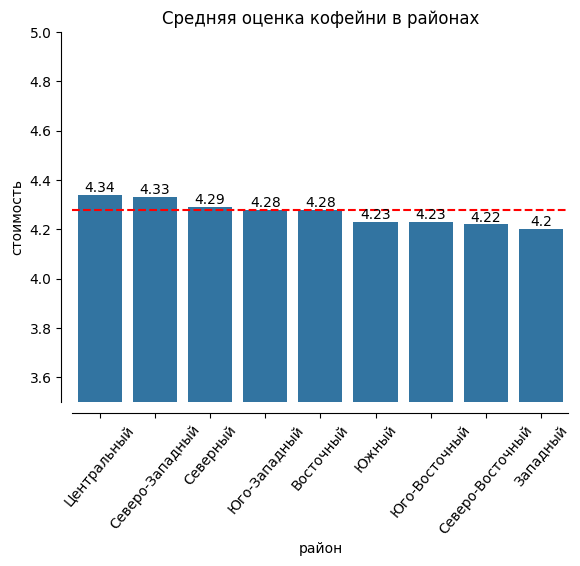

In [646]:

ax = sb.barplot(coffein_rating_district,x='district',y='rating');
sb.despine(offset=8);
plt.title('Средняя оценка кофейни в районах');
plt.ylabel('стоимость');
plt.xlabel('район');
ax.set_ylim(3.5,5)
plt.xticks(rotation=50)
ax.bar_label(ax.containers[0], fontsize=10);

# средний рейтинг кофейн города
plt.axhline(y=coffein['rating'].mean(),color='red',linestyle='--');

Промежуточный вывод   
Кофейни оценки которых выше средней оценки всех кофейн города, находятся в Центральном,Северо-Западном районах .   
На уровне среднего находятся в Юго-Западном ,Северном, Восточном.
Ниже среднего - в Южном, Юго-Восточном,Северо-Восточном,Западном. 

<a id="end"></a>
## Итог

Всего кофеен 1413 или 16,8% от общего числа заведений   
Кофеен большге всего находится в Центральном районе   


Большинство кофеен не круглосуточные    
А работают в основном ежденевно и с 10 утра до 22.00

Средний чек чашки капучино по городу - 170 рублей,  
Стоимость чашки капучино выше среднего в   
Западном(190 рублей),  
 центральном (188 рублей),    
 Юго-Западном(184) и    
 Восточном(174).   
Ниже среднего в    
Северном(166),     
Северо-Западном(166),    
Северо-Восточном(165),    
Южном(158),    
Юго-Восточном районах(151).

Кофейни,
 оценки которых выше средней оценки всех кофейн города,
находятся в: 
 Центральном(4.34),    
 Северо-Западном районах(4.33) .   
На уровне среднего находятся в: 
 Юго-Западном,    
 Северном, Восточном.   
Ниже среднего - 
в Южном,    
Юго-Восточном,    
Северо-Восточном,   
Западном. 

### Рекомендации

Кофейню можно разместить Северо-Восточном районе .
Стоимость чашки капучино рекомендуется взять около 170 рублей - это расценка ниже  предлагаемом районе и равна среднему значению по городу, чтобы привлечь клиентов. 
В Северо-Восточномм районе самая низкая оценка кофеен , следовательно можно смело конкурировать среди кофеен данного района.
